In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
df = pd.read_csv("/content/drive/MyDrive/Fish.csv")

In [5]:
df.head

<bound method NDFrame.head of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the dataset into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/Fish.csv")


# One-hot encoding for the categorical feature (Species)
one_hot_encoder = OneHotEncoder()
species_one_hot = one_hot_encoder.fit_transform(df[['Species']]).toarray()
species_one_hot_df = pd.DataFrame(species_one_hot, columns=one_hot_encoder.get_feature_names_out(['Species']))

# Drop the original Species column and concatenate one-hot encoded columns
df = pd.concat([df.drop('Species', axis=1), species_one_hot_df], axis=1)

# Apply MinMaxScaler for standardization of numerical features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop('Weight', axis=1))
scaled_features_df = pd.DataFrame(scaled_features, columns=df.columns[1:])

# Combine the target variable (Weight) with the scaled features
preprocessed_df = pd.concat([df['Weight'], scaled_features_df], axis=1)

# Split the data into training and testing sets
train_data, test_data = train_test_split(preprocessed_df, test_size=0.2, random_state=42)


In [10]:
preprocessed_df

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,0.304854,0.309091,0.358108,0.568334,0.418978,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,290.0,0.320388,0.325455,0.378378,0.624055,0.459235,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,340.0,0.318447,0.329091,0.376689,0.618123,0.514279,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,363.0,0.365049,0.374545,0.417230,0.638566,0.480365,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,430.0,0.368932,0.374545,0.425676,0.621966,0.576004,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,0.077670,0.069091,0.077703,0.021012,0.048771,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,13.4,0.081553,0.072727,0.079392,0.040723,0.031208,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,12.2,0.089320,0.083636,0.084459,0.031842,0.029347,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,19.7,0.110680,0.107273,0.108108,0.066424,0.143719,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Import necessary libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [12]:
# Separate the features (X) from the target variable (y) in both datasets
X_train = train_data.drop('Weight', axis=1).values
y_train = train_data['Weight'].values
X_test = test_data.drop('Weight', axis=1).values
y_test = test_data['Weight'].values

In [39]:
# Build the TensorFlow model using Keras
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Evaluate the model on the test dataset
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {test_mae}")

Epoch 1/500
4/4 [==============================] - 1s 46ms/step - loss: 300506.8125 - mean_absolute_error: 407.9147 - val_loss: 156729.6406 - val_mean_absolute_error: 296.1018
Epoch 2/500
4/4 [==============================] - 0s 10ms/step - loss: 292556.9062 - mean_absolute_error: 399.3003 - val_loss: 141161.3594 - val_mean_absolute_error: 274.7304
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 255148.7188 - mean_absolute_error: 363.4484 - val_loss: 98500.3281 - val_mean_absolute_error: 216.2733
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 168255.5000 - mean_absolute_error: 275.8828 - val_loss: 38237.9766 - val_mean_absolute_error: 137.3000
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 74206.2734 - mean_absolute_error: 198.0658 - val_loss: 91908.5859 - val_mean_absolute_error: 282.8166
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 110908.3203 - mean_absolute_error: 300.2481 - val_loss

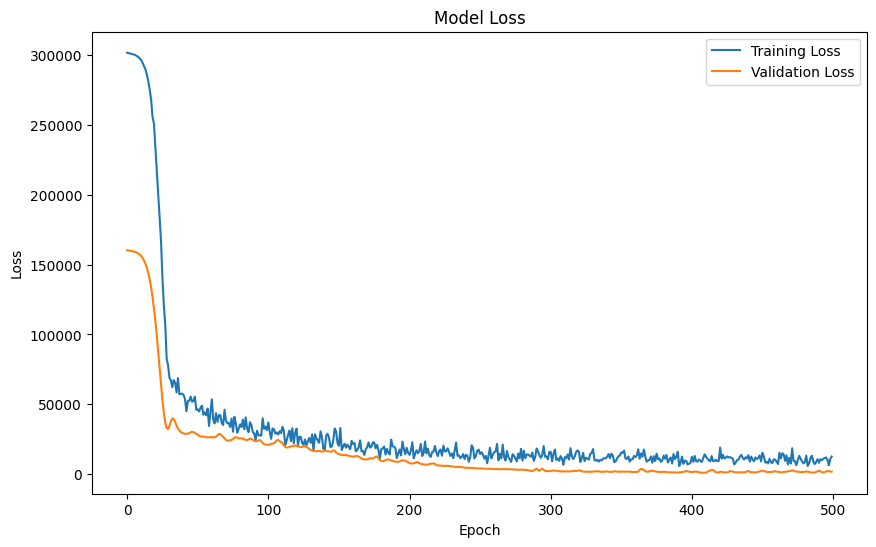

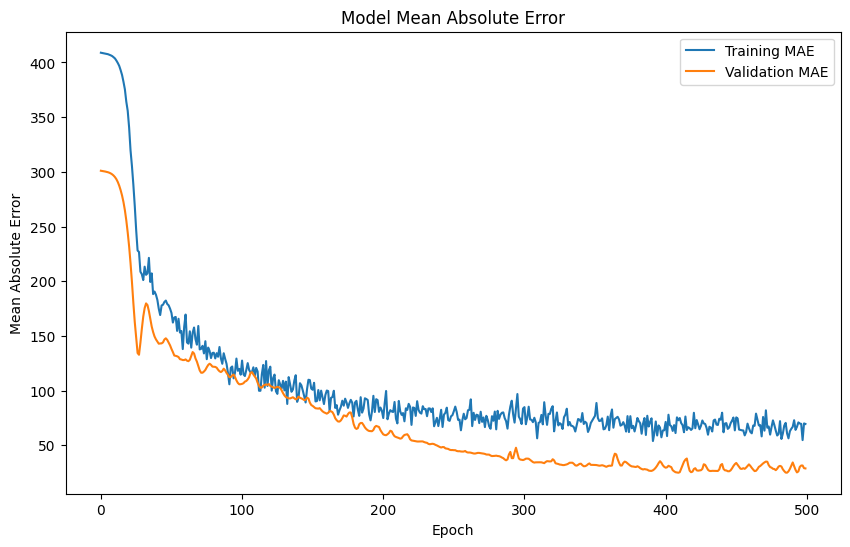

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation mean absolute error values
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [38]:
import numpy as np

def predict_random_test_data(X_test, y_test, model):
    # Select a random index from the test set
    random_index = np.random.randint(0, len(X_test))
    
    # Extract the features and true weight for the selected data point
    test_data = X_test[random_index]
    true_weight = y_test[random_index]
    
    # Make a prediction using the model
    predicted_weight = model.predict(test_data.reshape(1, -1)).flatten()[0]

    # Print the test data parameters and the predicted weight
    print("Test Data Parameters:")
    print(f"Length1: {test_data[0]}, Length2: {test_data[1]}, Length3: {test_data[2]}, Height: {test_data[3]}, Width: {test_data[4]}")
    for idx, species in enumerate(one_hot_encoder.categories_[0]):
        print(f"Species_{species}: {test_data[5 + idx]}")
    print("\nTrue Weight:", true_weight)
    print("Predicted Weight:", predicted_weight)

# Call the function to make a prediction on a random test data point
predict_random_test_data(X_test, y_test, model)


1/1 [==============================] - 0s 20ms/step
Test Data Parameters:
Length1: 0.0737864077669903, Length2: 0.0618181818181818, Length3: 0.07263513513513511, Height: 0.028179886932194156, Width: 0.016675124041497513
Species_Bream: 0.0
Species_Parkki: 0.0
Species_Perch: 0.0
Species_Pike: 0.0
Species_Roach: 0.0
Species_Smelt: 1.0
Species_Whitefish: 0.0

True Weight: 9.9
Predicted Weight: 11.300606


In [43]:
# Import necessary libraries
import numpy as np

# Define the function to predict a random test data point
def predict_random_test_data(model, X_test, y_test):
    # Select a random data point from the test set
    random_index = np.random.randint(0, len(X_test))
    selected_data = X_test[random_index]
    
    # Make a prediction using the trained model
    predicted_weight = model.predict(selected_data.reshape(1, -1))[0][0]
    
    # Display the selected data point's parameters and the predicted weight
    print(f"Selected Test Data (index {random_index}):")
    print(f"Features: {selected_data}")
    print(f"Actual Weight: {y_test[random_index]}")
    print(f"Predicted Weight: {predicted_weight}")

# Call the function to make a prediction on one random data point from the test set
predict_random_test_data(model, X_test, y_test)


1/1 [==============================] - 0s 15ms/step
Selected Test Data (index 21):
Features: [0.45436893 0.45636364 0.50337838 0.807065   0.57597542 1.
 0.         0.         0.         0.         0.         0.        ]
Actual Weight: 610.0
Predicted Weight: 578.134033203125


In [44]:
# Define the function to predict a random test data point
def predict_random_test_data(model, X_test, y_test, scaler, one_hot_encoder):
    # Select a random data point from the test set
    random_index = np.random.randint(0, len(X_test))
    selected_data = X_test[random_index]
    
    # Inverse scaling of the features
    unscaled_data = scaler.inverse_transform(selected_data.reshape(1, -1))

    # Decode one-hot encoded species
    one_hot_species = unscaled_data[0, -one_hot_encoder.categories_[0].shape[0]:]
    species = one_hot_encoder.categories_[0][np.argmax(one_hot_species)]

    # Combine the decoded species with the other features
    original_features = np.concatenate(([species], unscaled_data[0, :-one_hot_encoder.categories_[0].shape[0]]))
    
    # Make a prediction using the trained model
    predicted_weight = model.predict(selected_data.reshape(1, -1))[0][0]
    
    # Display the selected data point's parameters and the predicted weight
    print(f"Selected Test Data (index {random_index}):")
    print(f"Features (Original): {original_features}")
    print(f"Actual Weight: {y_test[random_index]}")
    print(f"Predicted Weight: {predicted_weight}")

# Call the function to make a prediction on one random data point from the test set
predict_random_test_data(model, X_test, y_test, scaler, one_hot_encoder)


1/1 [==============================] - 0s 18ms/step
Selected Test Data (index 3):
Features (Original): ['Whitefish' '23.6' '25.999999999999996' '28.7' '8.3804' '4.2476']
Actual Weight: 270.0
Predicted Weight: 240.50387573242188


In [47]:
# Define the function to predict a random test data point
def predict_random_test_data(model, X_test, y_test, scaler, one_hot_encoder):
    # Select a random data point from the test set
    random_index = np.random.randint(0, len(X_test))
    selected_data = X_test[random_index]
    
    # Inverse scaling of the features
    unscaled_data = scaler.inverse_transform(selected_data.reshape(1, -1))

    # Decode one-hot encoded species
    one_hot_species = unscaled_data[0, -one_hot_encoder.categories_[0].shape[0]:]
    species = one_hot_encoder.categories_[0][np.argmax(one_hot_species)]

    # Combine the decoded species with the other features
    original_features = np.concatenate(([species], unscaled_data[0, :-one_hot_encoder.categories_[0].shape[0]]))

    # Create a DataFrame to display the original features with column names
    feature_names = ['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
    features_df = pd.DataFrame([original_features], columns=feature_names)
    
    # Make a prediction using the trained model
    predicted_weight = model.predict(selected_data.reshape(1, -1))[0][0]
    
    # Display the selected data point's parameters and the predicted weight
    print(f"Selected Test Data (index {random_index}):")
    print("\nFeatures (Original):")
    display(features_df)
    print(f"Actual Weight: {y_test[random_index]}")
    print(f"Predicted Weight: {predicted_weight}")

# Call the function to make a prediction on one random data point from the test set
predict_random_test_data(model, X_test, y_test, scaler, one_hot_encoder)


1/1 [==============================] - 0s 18ms/step
Selected Test Data (index 0):

Features (Original):


,Species,Length1,Length2,Length3,Height,Width
0,Perch,16.8,18.7,19.4,5.1992,3.1234


Actual Weight: 78.0
Predicted Weight: 84.73212432861328


In [53]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Build an improved TensorFlow model using Keras
improved_model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='linear')
])

# Compile the improved model
improved_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Implement early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the improved model
history = improved_model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split=0.2, verbose=2)

# Evaluate the improved model on the test dataset
test_loss, test_mae = improved_model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {test_mae}")


Epoch 1/500
7/7 - 1s - loss: 301161.5312 - mean_absolute_error: 408.5735 - val_loss: 159712.1875 - val_mean_absolute_error: 300.3690 - 921ms/epoch - 132ms/step
Epoch 2/500
7/7 - 0s - loss: 300225.2500 - mean_absolute_error: 407.6204 - val_loss: 158890.4688 - val_mean_absolute_error: 299.1880 - 41ms/epoch - 6ms/step
Epoch 3/500
7/7 - 0s - loss: 298630.9375 - mean_absolute_error: 406.1266 - val_loss: 157424.6094 - val_mean_absolute_error: 297.1001 - 40ms/epoch - 6ms/step
Epoch 4/500
7/7 - 0s - loss: 295745.8125 - mean_absolute_error: 403.1686 - val_loss: 154672.0625 - val_mean_absolute_error: 293.1819 - 55ms/epoch - 8ms/step
Epoch 5/500
7/7 - 0s - loss: 289996.7812 - mean_absolute_error: 397.6443 - val_loss: 149553.7188 - val_mean_absolute_error: 285.8092 - 38ms/epoch - 5ms/step
Epoch 6/500
7/7 - 0s - loss: 280383.0312 - mean_absolute_error: 387.9064 - val_loss: 140474.6875 - val_mean_absolute_error: 273.7215 - 38ms/epoch - 5ms/step
Epoch 7/500
7/7 - 0s - loss: 261984.0469 - mean_absolut

In [58]:
predict_random_test_data(improved_model, X_test, y_test, scaler, one_hot_encoder)


1/1 [==============================] - 0s 16ms/step
Selected Test Data (index 27):

Features (Original):


,Species,Length1,Length2,Length3,Height,Width
0,Whitefish,24.1,26.5,29.3,8.1454,4.2485


Actual Weight: 270.0
Predicted Weight: 195.47763061523438
